### D_TREE_MODELING

In [85]:
import pandas as pd
import time
pd.set_option('max_rows',40)
pd.set_option('max_colwidth',400)
pd.describe_option('max_colwidth')
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
execution_start_time = time.time()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from IPython.display import Image 
import time
from sklearn.tree import export_graphviz
#import pydotplus

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [86]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('onehotEncoded.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data Shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   Attrition                 2940 non-null   int64
 2   BusinessTravel            2940 non-null   int64
 3   DailyRate                 2940 non-null   int64
 4   Department                2940 non-null   int64
 5   DistanceFromHome          2940 non-null   int64
 6   Education                 2940 non-null   int64
 7   EducationField            2940 non-null   int64
 8   EmployeeNumber            2940 non-null   int64
 9   EnvironmentSatisfaction   2940 non-null   int64
 10  Gender                    2940 non-null   int64
 11  HourlyRate                2940 non-null   int64
 12  JobInvolvement            2940 non-null   int64
 13  JobLevel                  2940 non-n

In [87]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    res_df['OverTime'] =  le.fit_transform(res_df['OverTime'])           
    return res_df

In [88]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,3,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,5,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [89]:
# encoded_df.head()
x = df.drop(['Attrition'],axis =1).values
y = df['Attrition'].values
(df['Attrition'].value_counts()/df.shape[0])*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

### Split the data into Train-Test

In [90]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

### FEATURE SCALING

In [91]:
# from sklearn.preprocessing import StandardScaler

In [92]:
# # we should apply feature scaling after the test to prevent information lekage.
# ## shoud not apply feature scaling on dummy variable . because standradization it self 
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)

## Get best Hyper-Parameter Optimization usng GridSearchCv

In [93]:
def getOptimalParams(param_dist):
    np.random.seed(42)
    start = time.time()
    bestParams = {}
    cv_rf = GridSearchCV(model_dt, cv = 8,
                     param_grid=param_dist, 
                     n_jobs = 3)
    ## set trained data
    cv_rf.fit(x_train,y_train)
    bestParams['bestparams']= cv_rf.best_params_
    end = time.time()
    bestParams['Time taken in grid search'] = '{0:.2f}'.format(end-start)
    
    return bestParams
    

In [94]:
setOptimalParams = {
    'max_depth':[1,2,3,4,5],
    'criterion':['gini'],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2],
    'max_features': ['auto'],
                    }
optimalParams = getOptimalParams(setOptimalParams)
optimalParams

{'bestparams': {'criterion': 'gini',
  'max_depth': 5,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 'Time taken in grid search': '0.24'}

### Build the Decision tree Model

In [95]:
# Decision tree with depth = 2
opt_parms = optimalParams['bestparams'];

model_dt_2 = DecisionTreeClassifier(random_state=1, **opt_parms)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.875
Testing score:  0.8435374149659864


In [96]:
y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]
y_pred_dt

array([0.06057495, 0.06057495, 0.06057495, 0.46666667, 0.06057495,
       0.06057495, 0.08571429, 0.06057495, 0.06057495, 0.26666667,
       0.275     , 0.06057495, 0.06057495, 0.66666667, 0.06057495,
       0.        , 0.06057495, 0.08571429, 0.06057495, 0.06057495,
       0.10810811, 0.06057495, 0.08571429, 0.2195122 , 0.08571429,
       0.06057495, 0.        , 0.46666667, 0.19117647, 0.06057495,
       0.26666667, 0.11622276, 0.08571429, 0.06057495, 0.08571429,
       0.08571429, 0.06057495, 0.11622276, 0.08571429, 0.06057495,
       0.11622276, 0.11622276, 0.11622276, 0.08571429, 0.71428571,
       0.08571429, 0.275     , 0.1744186 , 0.11622276, 0.06057495,
       0.06057495, 0.08571429, 1.        , 0.06057495, 0.26666667,
       0.26666667, 0.30909091, 0.11622276, 0.06057495, 0.11622276,
       0.06057495, 0.06057495, 0.275     , 0.        , 0.06057495,
       0.08571429, 0.11622276, 0.08571429, 0.06057495, 0.46666667,
       0.43283582, 0.275     , 0.06057495, 0.26666667, 0.11622

### Performance Metrics

In [97]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [98]:
predictions = model_dt.predict(x_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Area Under the Curve

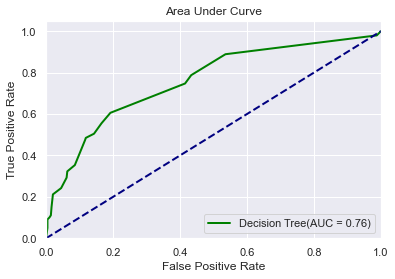

In [99]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix

In [100]:
print (confusion_matrix(y_test, predictions))

[[485   4]
 [ 25  74]]


In [101]:
cm_df = pd.DataFrame(confusion_matrix(y_test, predictions).T, index=model_dt_2.classes_,
                     columns=model_dt_2.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, predictions))
print(model_dt_2.score(x_test,y_test))

print("Total time taken" , ((time.time() - execution_start_time)/60))

True         0   1
Predicted         
0          485  25
1            4  74
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       489
           1       0.95      0.75      0.84        99

    accuracy                           0.95       588
   macro avg       0.95      0.87      0.90       588
weighted avg       0.95      0.95      0.95       588

0.8435374149659864
Total time taken 0.10697034597396851


In [102]:
accuracy_score(y_test, predictions)

0.9506802721088435

In [103]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[1, 0])
    classes=["Success", "Fail"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

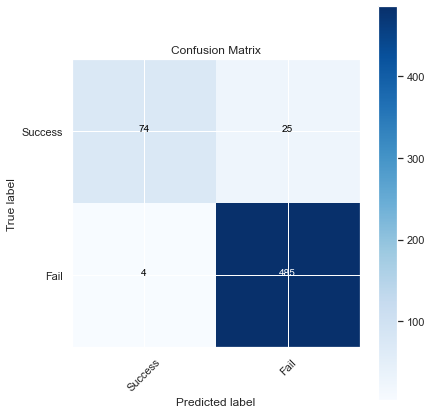

In [104]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

In [105]:
# colormap = plt.cm.viridis
# plt.figure(figsize=(12,12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)